<h2 align=center>Exploratory Data Analysis With Python and Pandas</h2>

### Libraries

In [1]:
import sys
!{sys.executable} -m pip install pandas-profiling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from pandas_profiling import ProfileReport

Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Task 1: Initial Data Exploration

In [3]:
df = pd.read_csv('supermarket_sales.csv')

In [4]:
df.head(10)

Invoice ID Branch       City Customer type  Gender  \
0  594-34-4444      A     Yangon        Normal    Male   
1  766-85-7061      B   Mandalay        Normal    Male   
2  871-39-9221      C  Naypyitaw        Normal  Female   
3  865-92-6136      A     Yangon        Normal    Male   
4  733-01-9107      B   Mandalay        Normal    Male   
5  163-56-7055      C  Naypyitaw        Member    Male   
6  189-98-2939      C  Naypyitaw        Normal    Male   
7  551-21-3069      C  Naypyitaw        Normal  Female   
8  212-62-1842      A     Yangon        Normal    Male   
9  716-39-1409      B   Mandalay        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0  Electronic accessories       97.16       1.0   4.8580  102.0180   3/8/2019   
1       Health and beauty       87.87      10.0  43.9350  922.6350  3/29/2019   
2  Electronic accessories       12.45       6.0   3.7350   78.4350   2/9/2019   
3      Food and beverages       52.75       3.0   7.9125  166.1625  3/23/2019   
4      Home and lifestyle       82.70       6.0  24.8100  521.0100   3/5/2019   
5     Fashion accessories       48.71       1.0   2.4355   51.1455  3/26/2019   
6     Fashion accessories       78.55       9.0  35.3475  742.2975   3/1/2019   
7  Electronic accessories       23.07       9.0  10.3815  218.0115   2/1/2019   
8      Food and beverages       58.26       6.0  17.4780  367.0380  3/28/2019   
9       Health and beauty       30.35       7.0  10.6225  223.0725  3/19/2019   

    Time  Payment    cogs  gross margin percentage  gross income  Rating  
0  20:38  Ewallet   97.16                 4.761905        4.8580     7.2  
1  10:25  Ewallet  878.70                 4.761905       43.9350     5.1  
2  13:11     Cash   74.70                 4.761905        3.7350     4.1  
3  10:16  Ewallet  158.25                 4.761905        7.9125     9.3  
4  18:14     Cash  496.20                 4.761905       24.8100     7.4  
5  19:20     Cash   48.71                 4.761905        2.4355     4.1  
6  13:22     Cash  706.95                 4.761905       35.3475     7.2  
7  11:27     Cash  207.63                 4.761905       10.3815     4.9  
8  16:44     Cash  349.56                 4.761905       17.4780     9.9  
9  18:19     Cash  212.45                 4.761905       10.6225     8.0

In [5]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [6]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [7]:
#the Date column should be the datetime type
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
#we want to set the date column as the index labels
df.set_index('Date',inplace=True)

In [9]:
df.describe()

Unit price    Quantity      Tax 5%        Total        cogs  \
count  901.000000  888.000000  908.000000   908.000000  908.000000   
mean    55.477281    5.463964   15.184649   318.877622  303.692974   
std     26.498326    2.928083   11.693400   245.561397  233.867997   
min     10.080000    1.000000    0.508500    10.678500   10.170000   
25%     32.620000    3.000000    5.824750   122.319750  116.495000   
50%     54.730000    5.000000   11.962500   251.212500  239.250000   
75%     77.680000    8.000000   22.065000   463.365000  441.300000   
max     99.960000   10.000000   49.650000  1042.650000  993.000000   

       gross margin percentage  gross income      Rating  
count               908.000000    908.000000  908.000000  
mean                  4.761905     15.184649    6.979515  
std                   0.000000     11.693400    1.722450  
min                   4.761905      0.508500    4.000000  
25%                   4.761905      5.824750    5.500000  
50%                   4.761905     11.962500    7.000000  
75%                   4.761905     22.065000    8.500000  
max                   4.761905     49.650000   10.000000

### Task 2: Univariate Analysis

**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

C:\Users\vu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


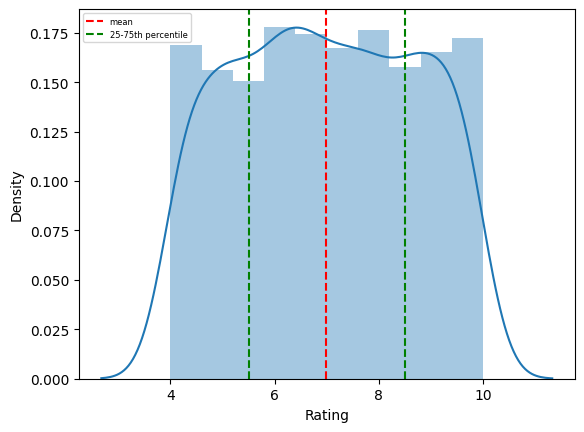

In [10]:
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']),c='red',ls='--',label='mean')
plt.axvline(x=np.percentile(df['Rating'],25),c='green',ls='--',label='25-75th percentile')
plt.axvline(x=np.percentile(df['Rating'],75),c='green',ls='--')
plt.legend(loc=2, prop={'size': 6})

**As you can see, the distribution of Rating looks relatively uniform, and there doesn't seem to be any skews in the left or right correction**

array([[<AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'cogs'}>,
        <AxesSubplot:title={'center':'gross margin percentage'}>],
       [<AxesSubplot:title={'center':'gross income'}>,
        <AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>]],
      dtype=object)

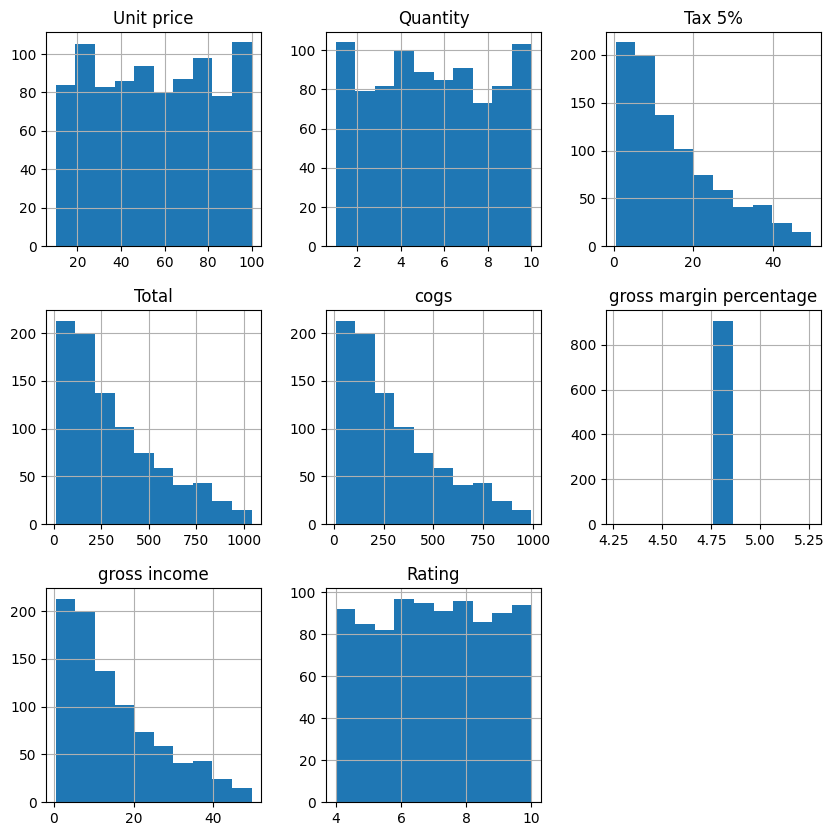

In [11]:
#We can also the distribution of other numeric variables
df.hist(figsize=(10,10))

**We can see the distributions of Unit Price and Quantity are uniformly distributed.
The tax distribution has a right skew.
The gross margin percentage is a constant value.
The Total,cogs,gross income are higly correlated so it's not surprised to see that they follow identical distributions.
And the rating, as we've seen before, has an uniform distribution.**

**Question 2:** Do aggregate sales numbers differ by much between branches?

<AxesSubplot:xlabel='Branch', ylabel='count'>

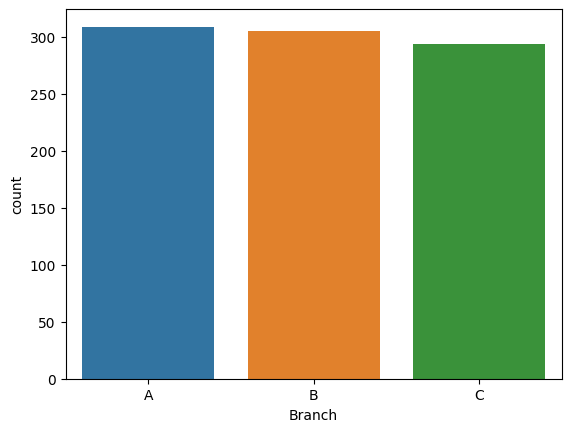

In [12]:
sns.countplot(x=df['Branch'])

In [13]:
df['Branch'].value_counts()

A    309
B    305
C    294
Name: Branch, dtype: int64

**So they don't differ by much**

<AxesSubplot:xlabel='Payment', ylabel='count'>

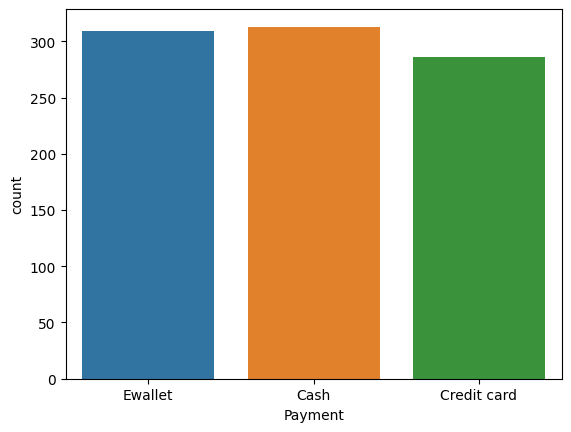

In [14]:
#We can also see the countlot for other categorical variables
sns.countplot(x=df['Payment'])

### Task 3: Bivariate Analysis

**Question 3:** Is there a relationship between gross income and customer ratings?

<AxesSubplot:xlabel='Rating', ylabel='gross income'>

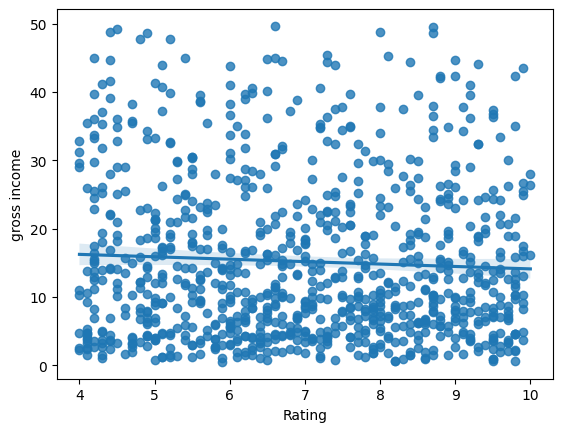

In [15]:
sns.regplot(x=df['Rating'],y=df['gross income'])

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

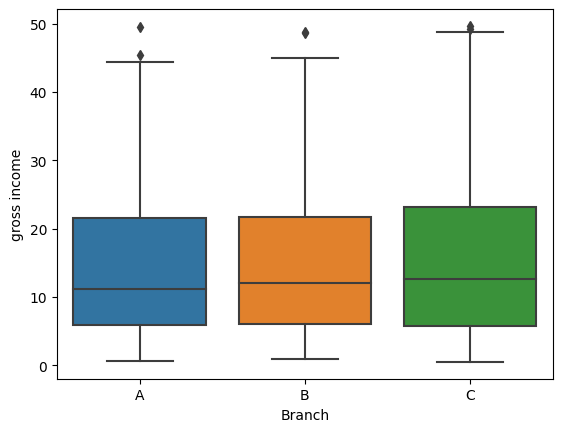

In [16]:
#Now I want to see the gross income of different branches
sns.boxplot(x=df['Branch'],y=df['gross income'])

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

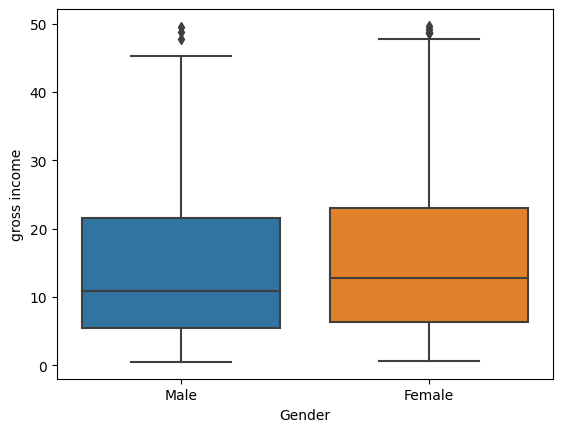

In [17]:
#So it doesn't seem to be much difference of gross income among the 3 branches
#We can also see if there is any relationship between genders and gross income
sns.boxplot(x=df['Gender'],y=df['gross income'])

**So it looks like there isn't any relationships between Rating and gross income**

**Question 4:** Is there a noticeable time trend in gross income?

In [18]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-03-08  594-34-4444      A     Yangon        Normal    Male   
2019-03-29  766-85-7061      B   Mandalay        Normal    Male   
2019-02-09  871-39-9221      C  Naypyitaw        Normal  Female   
2019-03-23  865-92-6136      A     Yangon        Normal    Male   
2019-03-05  733-01-9107      B   Mandalay        Normal    Male   

                      Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                                                          
2019-03-08  Electronic accessories       97.16       1.0   4.8580  102.0180   
2019-03-29       Health and beauty       87.87      10.0  43.9350  922.6350   
2019-02-09  Electronic accessories       12.45       6.0   3.7350   78.4350   
2019-03-23      Food and beverages       52.75       3.0   7.9125  166.1625   
2019-03-05      Home and lifestyle       82.70       6.0  24.8100  521.0100   

             Time  Payment    cogs  gross margin percentage  gross income  \
Date                                                                        
2019-03-08  20:38  Ewallet   97.16                 4.761905        4.8580   
2019-03-29  10:25  Ewallet  878.70                 4.761905       43.9350   
2019-02-09  13:11     Cash   74.70                 4.761905        3.7350   
2019-03-23  10:16  Ewallet  158.25                 4.761905        7.9125   
2019-03-05  18:14     Cash  496.20                 4.761905       24.8100   

            Rating  
Date                
2019-03-08     7.2  
2019-03-29     5.1  
2019-02-09     4.1  
2019-03-23     9.3  
2019-03-05     7.4

In [19]:
#Since there can be many invoices in the same day, we must groupby the date (which is the index labels) first.
subdf=df.groupby(df.index).mean()
subdf

Unit price  Quantity     Tax 5%       Total        cogs  \
Date                                                                  
2019-01-01   53.394545  6.500000  18.561636  389.794364  371.232727   
2019-01-02   44.944286  6.714286  12.931357  271.558500  258.627143   
2019-01-03   59.457500  4.625000  12.369813  259.766062  247.396250   
2019-01-04   51.743333  5.333333  12.886417  270.614750  257.728333   
2019-01-05   60.450000  4.363636  12.933818  271.610182  258.676364   
...                ...       ...        ...         ...         ...   
2019-03-26   42.972308  4.000000   7.188692  150.962538  143.773846   
2019-03-27   59.336250  4.500000  14.564062  305.845312  291.281250   
2019-03-28   45.525000  4.800000  10.616200  222.940200  212.324000   
2019-03-29   65.627143  6.285714  22.270429  467.679000  445.408571   
2019-03-30   67.408182  5.888889  19.424500  407.914500  388.490000   

            gross margin percentage  gross income    Rating  
Date                                                         
2019-01-01                 4.761905     18.561636  6.554545  
2019-01-02                 4.761905     12.931357  6.100000  
2019-01-03                 4.761905     12.369813  8.112500  
2019-01-04                 4.761905     12.886417  6.516667  
2019-01-05                 4.761905     12.933818  7.281818  
...                             ...           ...       ...  
2019-03-26                 4.761905      7.188692  6.623077  
2019-03-27                 4.761905     14.564062  6.812500  
2019-03-28                 4.761905     10.616200  7.050000  
2019-03-29                 4.761905     22.270429  7.100000  
2019-03-30                 4.761905     19.424500  6.800000  

[89 rows x 8 columns]

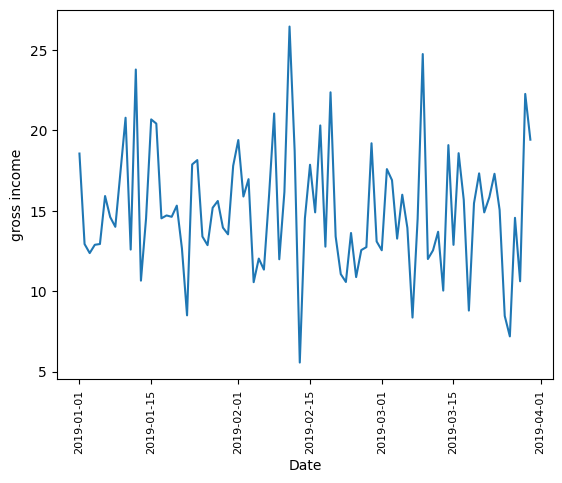

In [20]:
sns.lineplot(x=subdf.index,y=subdf['gross income'])
plt.xticks(rotation = 'vertical', size=8)
plt.show()

**So we  can see that there is no particular trend in the data, maybe it's because we only got data of 3 months. We can see the plots of other pairwise combinations of the dataset**

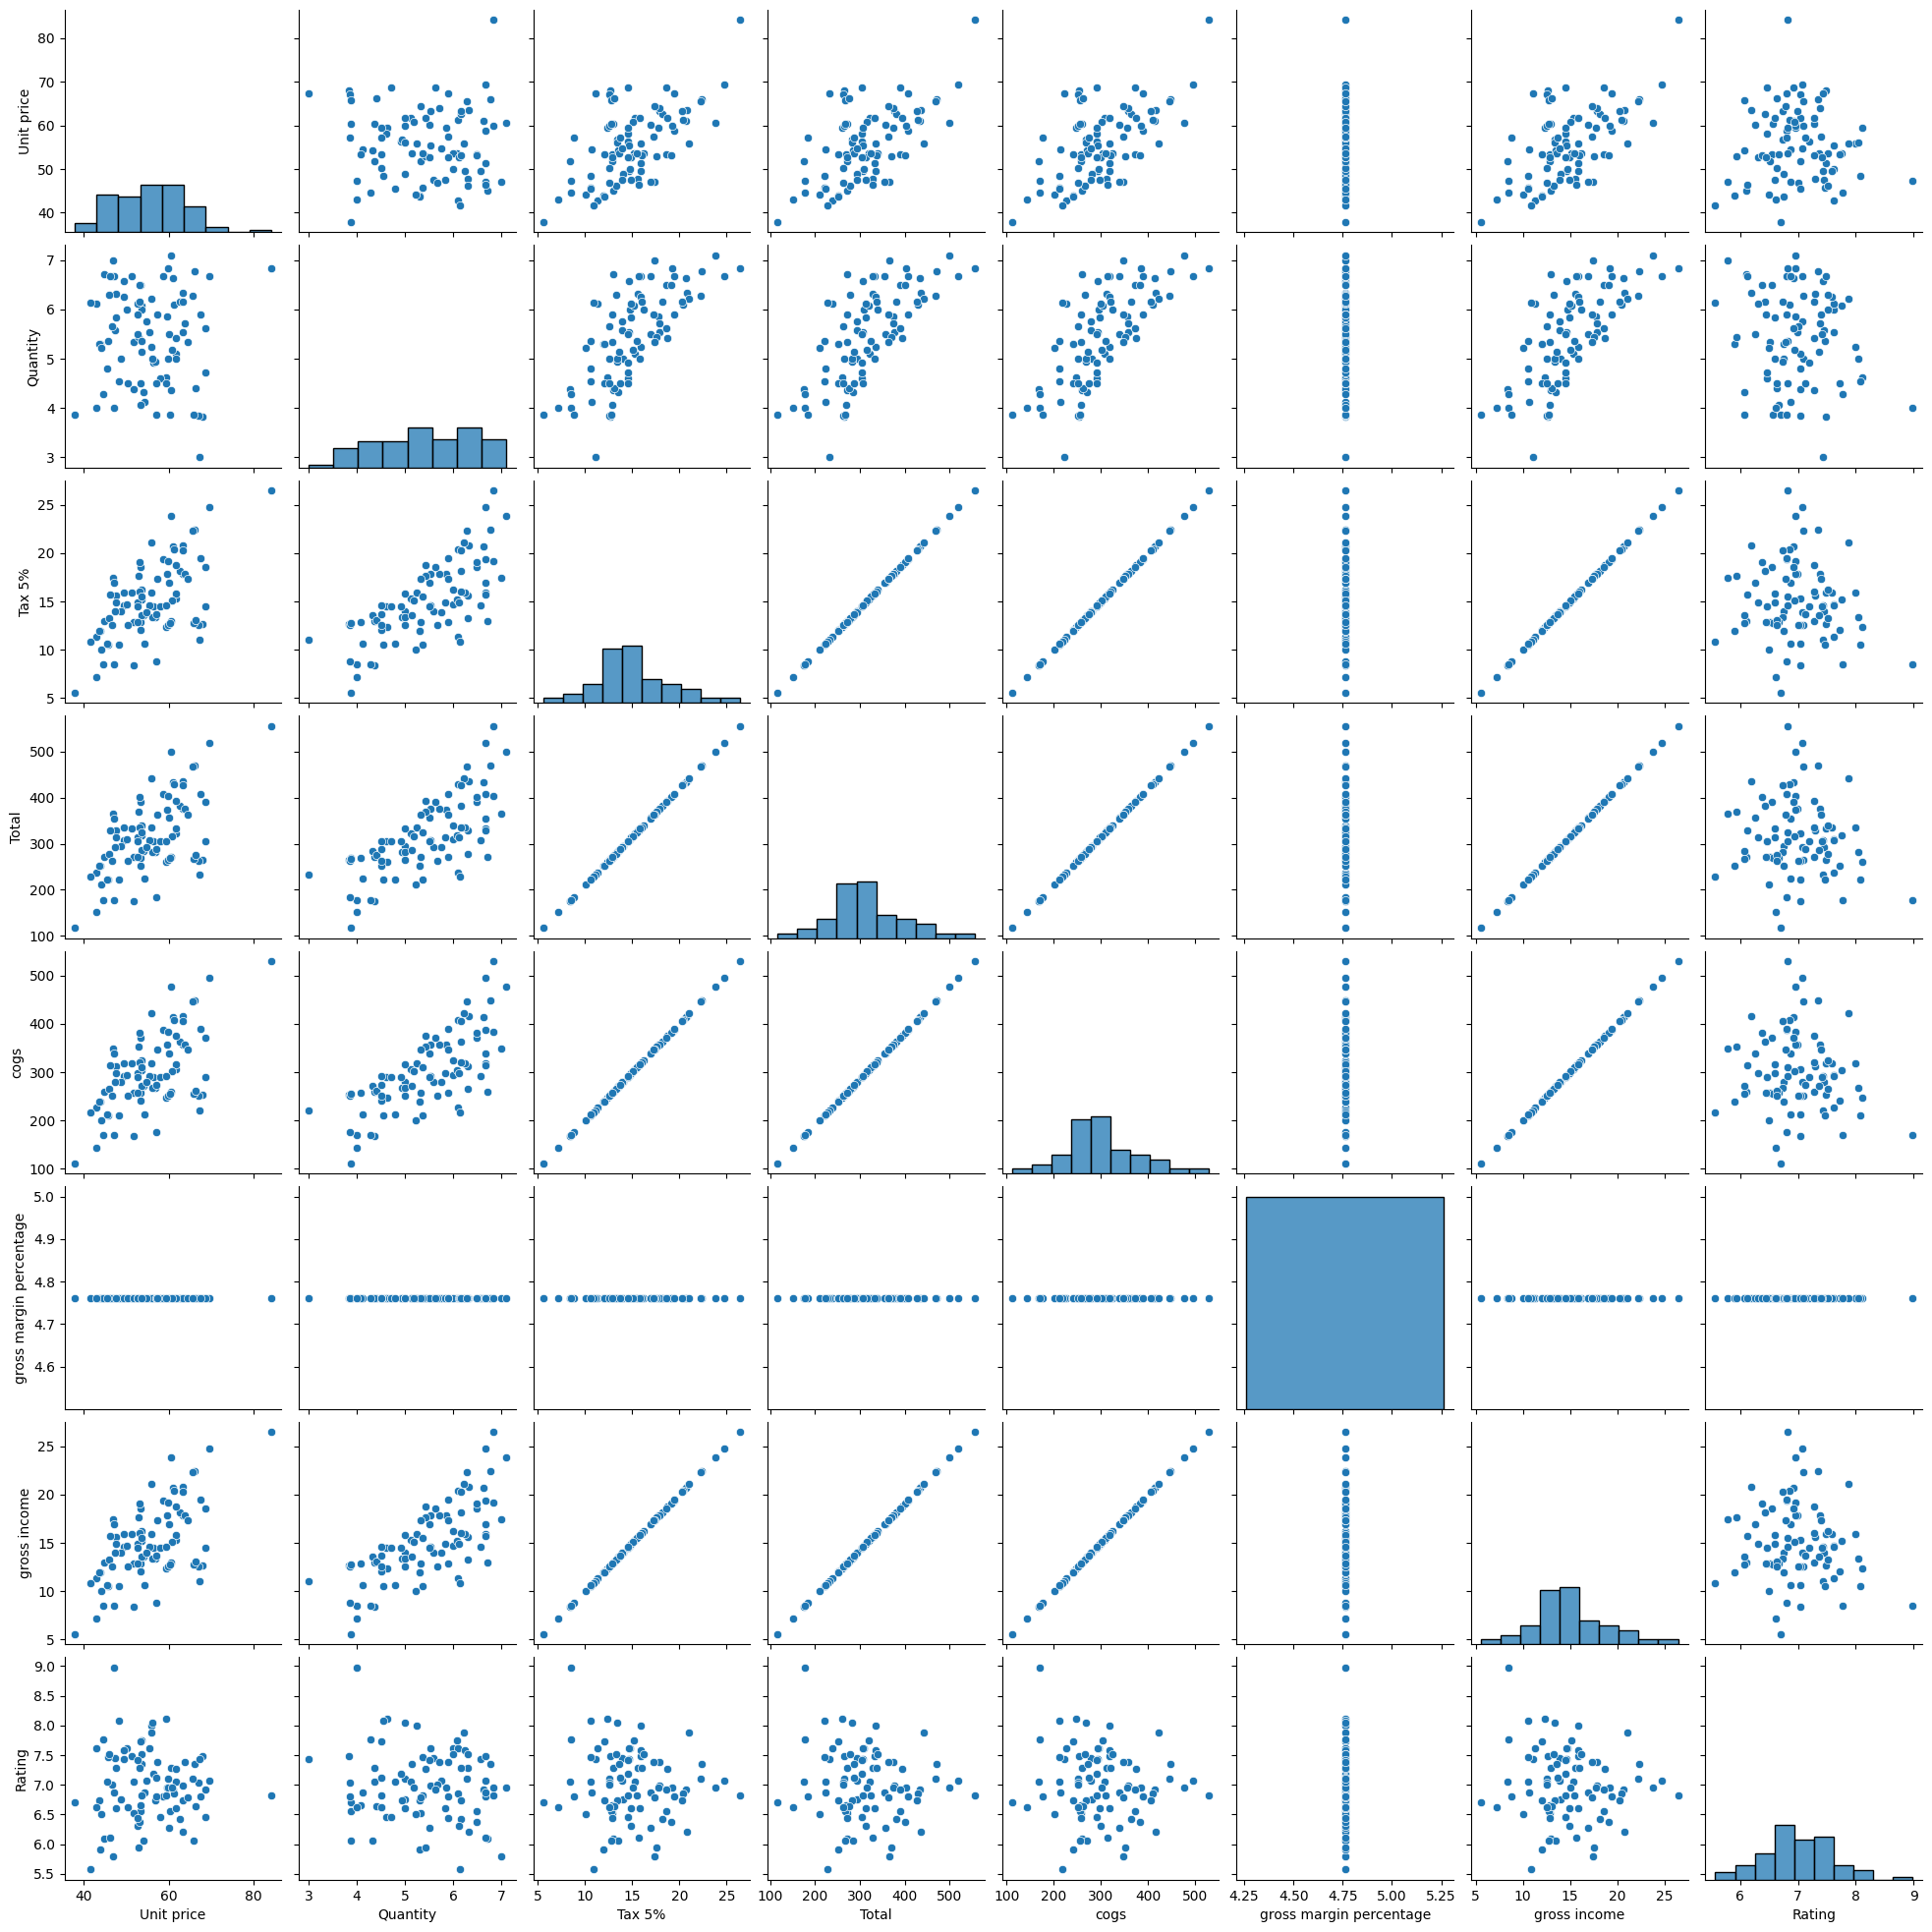

In [21]:
sns.pairplot(subdf)

### Task 4: Dealing With Duplicate Rows and Missing Values

In [22]:
#First, we can see how many duplicate rows there are
df.duplicated().sum()

3

In [23]:
#we want to see those specific rows
df[df.duplicated()==True]

Invoice ID Branch      City Customer type  Gender  \
Date                                                             
2019-02-18  849-09-3807      A    Yangon        Member  Female   
2019-03-10  745-74-0715      A    Yangon        Normal    Male   
2019-01-26  452-04-8808      B  Mandalay        Normal    Male   

                      Product line  Unit price  Quantity  Tax 5%    Total  \
Date                                                                        
2019-02-18     Fashion accessories       88.34       7.0  30.919  649.299   
2019-03-10  Electronic accessories         NaN       2.0   5.803  121.863   
2019-01-26  Electronic accessories       87.08       NaN  30.478  640.038   

             Time  Payment    cogs  gross margin percentage  gross income  \
Date                                                                        
2019-02-18  13:28     Cash  618.38                 4.761905        30.919   
2019-03-10  20:46  Ewallet  116.06                 4.761905         5.803   
2019-01-26  15:17     Cash  609.56                 4.761905        30.478   

            Rating  
Date                
2019-02-18     6.6  
2019-03-10     8.8  
2019-01-26     5.5

In [24]:
#now drop the duplicate rows
df.drop_duplicates(inplace=True)

In [25]:
#Now we will see if there is any missing values.
df.isna().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              72
Gender                      0
Product line               39
Unit price                  6
Quantity                   19
Tax 5%                      0
Total                       0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

<AxesSubplot:ylabel='Date'>

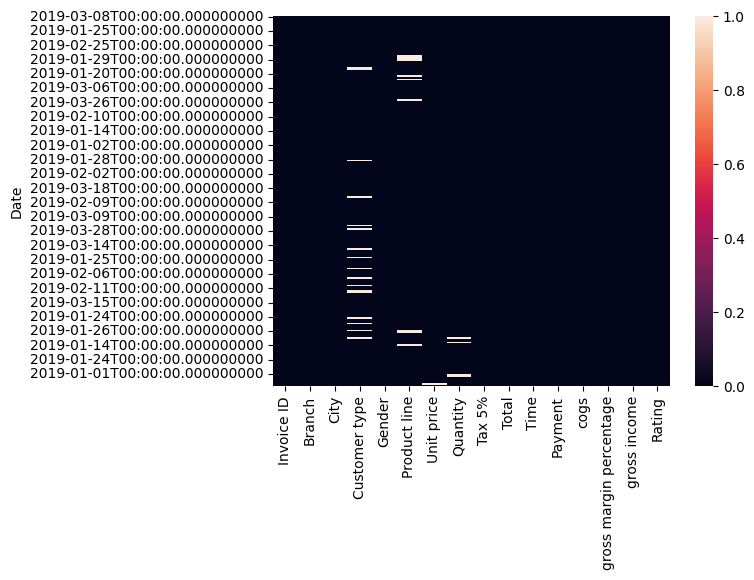

In [26]:
#we can use a heatmap to see how the missing values are scattered
sns.heatmap(df.isnull())

C:\Users\vu\AppData\Local\Temp\ipykernel_22532\1879207317.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(),inplace=True)


<AxesSubplot:ylabel='Date'>

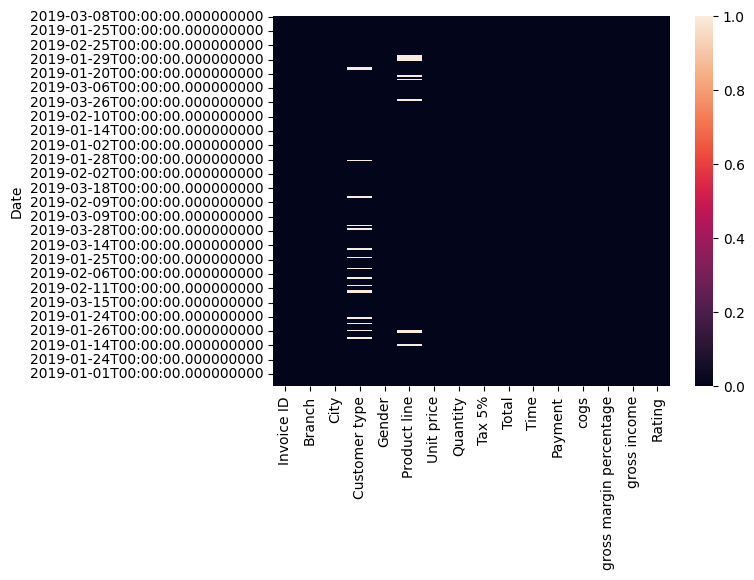

In [27]:
#we can fill in the missing values with the mean of the columns
df.fillna(df.mean(),inplace=True)
#However, it only fills in the missing values of numeric variables
sns.heatmap(df.isnull())

<AxesSubplot:ylabel='Date'>

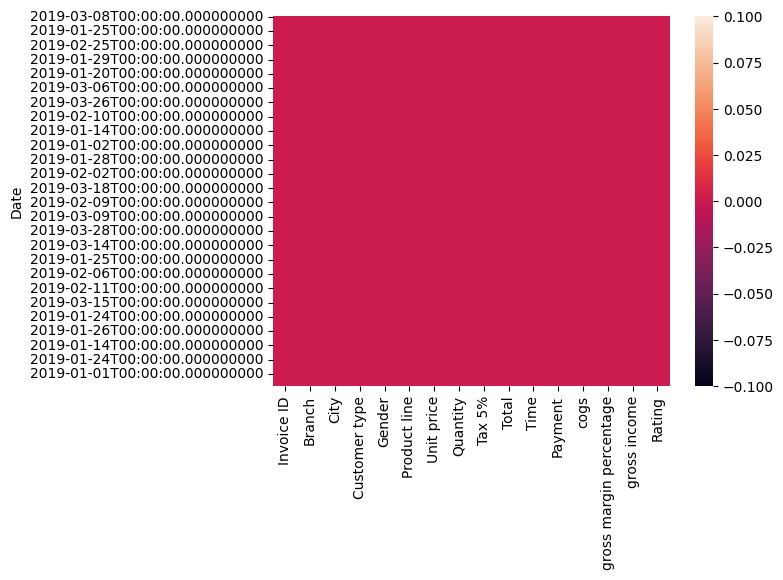

In [28]:
#To address this problem, we can fill in the mode value of the categorical values
df.fillna(df.mode().iloc[0],inplace=True)
sns.heatmap(df.isnull())

**Since we have a quite small dataset, we can use Pandas Profiling Report to streamline all of the steps we've made so far.**

In [29]:
dataset = pd.read_csv('supermarket_sales.csv')
prof = ProfileReport(dataset)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Task 5: Correlation Analysis

In [35]:
round(np.corrcoef(df['gross income'],df['Rating'])[1][0],2)

-0.05

In [37]:
#But it's kinda time-consuming to do that with every pairwise combinations in the dataset, so we want to look at
#a correlation matrix instead
np.round(df.corr(),2)

Unit price  Quantity  Tax 5%  Total  cogs  \
Unit price                     1.00      0.01    0.62   0.62  0.62   
Quantity                       0.01      1.00    0.70   0.70  0.70   
Tax 5%                         0.62      0.70    1.00   1.00  1.00   
Total                          0.62      0.70    1.00   1.00  1.00   
cogs                           0.62      0.70    1.00   1.00  1.00   
gross margin percentage         NaN       NaN     NaN    NaN   NaN   
gross income                   0.62      0.70    1.00   1.00  1.00   
Rating                        -0.01     -0.04   -0.05  -0.05 -0.05   

                         gross margin percentage  gross income  Rating  
Unit price                                   NaN          0.62   -0.01  
Quantity                                     NaN          0.70   -0.04  
Tax 5%                                       NaN          1.00   -0.05  
Total                                        NaN          1.00   -0.05  
cogs                                         NaN          1.00   -0.05  
gross margin percentage                      NaN           NaN     NaN  
gross income                                 NaN          1.00   -0.05  
Rating                                       NaN         -0.05    1.00

<AxesSubplot:>

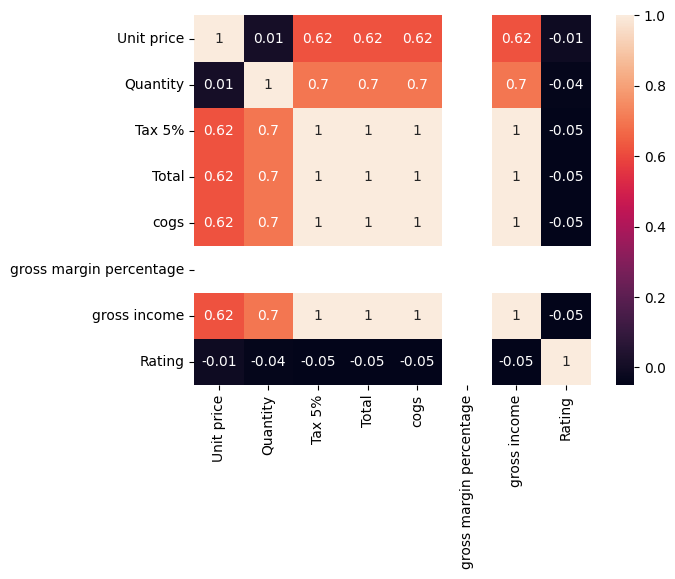

In [38]:
sns.heatmap(np.round(df.corr(),2),annot=True)